In [ ]:
! pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp '/content/drive/MyDrive/Colab Notebooks/kaggle_credentials/kaggle.json' ~/.kaggle/

cp: cannot stat '/content/drive/MyDrive/Colab Notebooks/kaggle_credentials/kaggle.json': No such file or directory


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! mkdir /content/kaggle_data

In [ ]:
%%shell
ls /
if [ ! -d "/root/.kaggle/kaggle.json" ]; then
  echo "$DIRECTORY does not exist."
fi

bin			    datalab  kaggle  libx32		       opt   sbin  tools
boot			    dev      lib     media		       proc  srv   usr
content			    etc      lib32   mnt		       root  sys   var
cuda-keyring_1.0-1_all.deb  home     lib64   NGC-DL-CONTAINER-LICENSE  run   tmp
 does not exist.


In [ ]:
! kaggle datasets download -p /content/kaggle_data tenxengineers/denoising-dataset-multiple-iso-levels

Dataset URL: https://www.kaggle.com/datasets/tenxengineers/denoising-dataset-multiple-iso-levels
License(s): CC-BY-SA-4.0
 99% 2.38G/2.40G [00:15<00:00, 251MB/s]
100% 2.40G/2.40G [00:15<00:00, 169MB/s]


In [ ]:
! unzip /content/kaggle_data/denoising-dataset-multiple-iso-levels.zip -d /content/kaggle_data/denoising-dataset-multiple-iso-levels/

Archive:  /content/kaggle_data/denoising-dataset-multiple-iso-levels.zip
  inflating: /content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/2DNR Denoising/Ground Truth/AlphaISP_2592x1536_8bits_Scene1.png  
  inflating: /content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/2DNR Denoising/Ground Truth/AlphaISP_2592x1536_8bits_Scene10.png  
  inflating: /content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/2DNR Denoising/Ground Truth/AlphaISP_2592x1536_8bits_Scene11.png  
  inflating: /content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/2DNR Denoising/Ground Truth/AlphaISP_2592x1536_8bits_Scene12.png  
  inflating: /content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/Alp

In [ ]:
from skimage import io

In [ ]:
image_1 = io.imread("/content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/2DNR Denoising/Noised/AlphaISP_2592x1536_8bits_Scene30.png")

In [ ]:
image_1

array([[[169, 134, 130],
        [154, 118, 115],
        [161, 126, 131],
        ...,
        [123,  72,  48],
        [119,  70,  39],
        [118,  69,  37]],

       [[168, 132, 129],
        [155, 120, 116],
        [159, 124, 129],
        ...,
        [110,  59,  35],
        [115,  65,  34],
        [119,  70,  39]],

       [[151, 106, 107],
        [150, 104, 106],
        [140,  96, 104],
        ...,
        [113,  75,  31],
        [112,  77,  30],
        [119,  84,  37]],

       ...,

       [[  8,   5,  54],
        [ 20,  16,  65],
        [ 21,  21,  67],
        ...,
        [201, 202, 186],
        [205, 205, 189],
        [201, 202, 186]],

       [[  8,  17,  62],
        [ 10,  19,  64],
        [  6,  14,  59],
        ...,
        [202, 200, 184],
        [203, 201, 186],
        [204, 202, 187]],

       [[ 15,  24,  69],
        [ 12,  20,  65],
        [  8,  17,  62],
        ...,
        [201, 199, 183],
        [204, 202, 187],
        [208, 206, 190]]

# Folder with noisy data

In [ ]:
import os

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
txt_files = []
for root, dirs, files in os.walk("/content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset"):
    for file in files:
        if file.endswith("AlphaISP_2592x1536_8bits_Scene30.png"):
            txt_files.append(os.path.join(root, file))

/content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/Bayer Denoising/Ground Truth/AlphaISP_2592x1536_8bits_Scene30.png
/content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/Bayer Denoising/Noised/AlphaISP_2592x1536_8bits_Scene30.png
/content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/2DNR Denoising/Ground Truth/AlphaISP_2592x1536_8bits_Scene30.png
/content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/2DNR Denoising/Noised/AlphaISP_2592x1536_8bits_Scene30.png


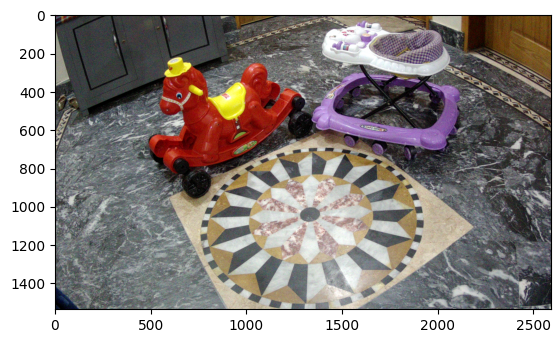

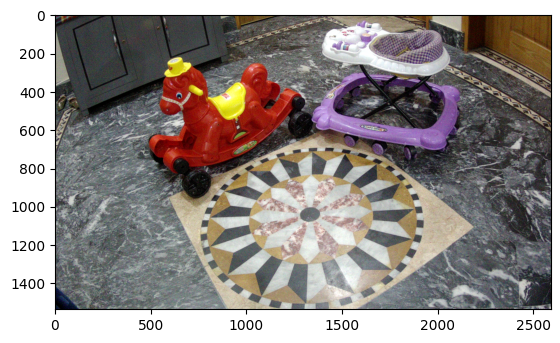

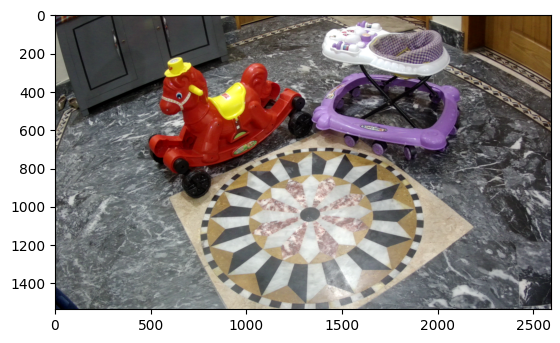

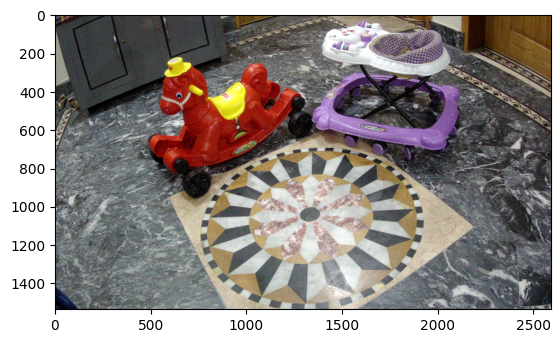

In [ ]:
for noisy_image in txt_files:
  print(noisy_image)
  image = io.imread(noisy_image)
  plt.figure()
  plt.imshow(image)

plt.show()

In [ ]:
im1 = io.imread(txt_files[0])
im2= io.imread(txt_files[1])
im3= io.imread(txt_files[2])
im4= io.imread(txt_files[3])

# Doing addition

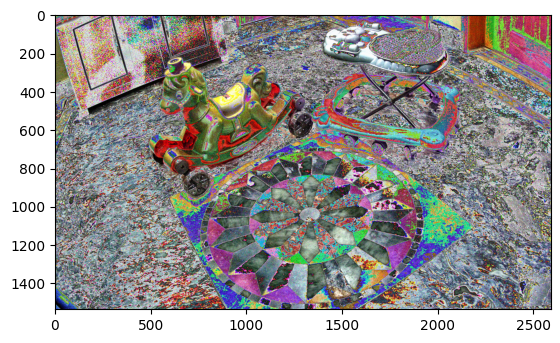

In [ ]:
imsum = im1+im2+im3+im4
imsum = np.uint8(np.clip(imsum, 0, 255))
plt.figure()
plt.imshow(imsum)
plt.show()

# Noise reduction by average

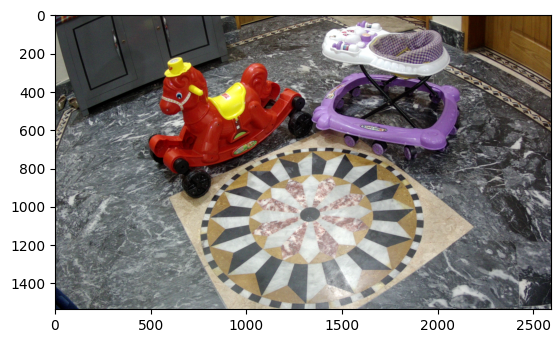

In [ ]:
averim = np.mean(np.array([im1, im2, im3, im4]), axis=0)
averim = np.uint8(np.clip(averim, 0, 255))
plt.figure()
plt.imshow(averim)
plt.show()

# Change detection by substraction

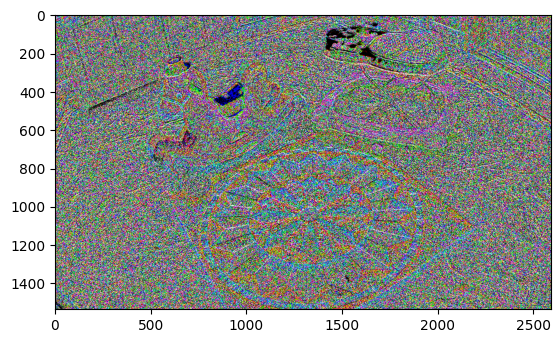

In [ ]:
imsub = im3 - im1
plt.figure()
plt.imshow(imsub)
plt.show()

# masking by multiplication

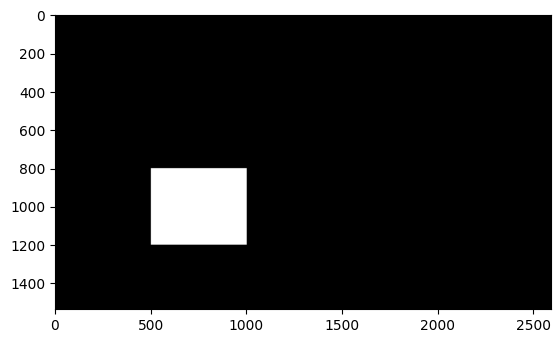

In [ ]:
neim = np.zeros_like(im1)

neim[800:1200, 500:1000]=255
# Display the new image
plt.figure()
plt.imshow(neim)
plt.show()
#set pixel to 1
neim[neim == 255] =1

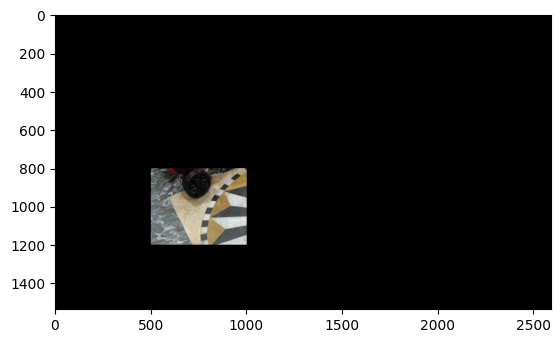

In [ ]:
tryim = im1*neim
plt.figure()
plt.imshow(tryim)
plt.show()